In [1]:
# load in all the modules we're going to need
import pandas as pd
import json
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#nltk.download('stopwords') #uncomment this if you do not have this downloaded already


In [3]:
#reading JSON file
# input your path to input file
path = '/Users/richa.awasthi/Downloads/News_Category_Dataset_v2.json'
data = pd.read_json(path_or_buf=path, lines=True)


In [4]:
(data)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ..."
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...


In [5]:
#combining data from headline and short_description
data['combined'] = pd.concat([data['headline'].astype(str), data['short_description'].astype(str)],ignore_index=True)


In [6]:
(data['combined'])

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2           Hugh Grant Marries For The First Time At Age 57
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
5         Morgan Freeman 'Devastated' That Sexual Harass...
6         Donald Trump Is Lovin' New McDonald's Jingle I...
7         What To Watch On Amazon Prime That’s New This ...
8         Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9                What To Watch On Hulu That’s New This Week
10        Justin Timberlake Visits Texas School Shooting...
11        South Korean President Meets North Korea's Kim...
12        With Its Way Of Life At Risk, This Remote Oyst...
13        Trump's Crackdown On Immigrant Parents Puts Mo...
14        'Trump's Son Should Be Concerned': FBI Obtaine...
15        Edward Snowden: There's No One Trump Loves Mor...
16        Booyah: Obama Photographer Hil

In [7]:
newdata = (data['combined'])

In [8]:
newdata

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2           Hugh Grant Marries For The First Time At Age 57
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
5         Morgan Freeman 'Devastated' That Sexual Harass...
6         Donald Trump Is Lovin' New McDonald's Jingle I...
7         What To Watch On Amazon Prime That’s New This ...
8         Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9                What To Watch On Hulu That’s New This Week
10        Justin Timberlake Visits Texas School Shooting...
11        South Korean President Meets North Korea's Kim...
12        With Its Way Of Life At Risk, This Remote Oyst...
13        Trump's Crackdown On Immigrant Parents Puts Mo...
14        'Trump's Son Should Be Concerned': FBI Obtaine...
15        Edward Snowden: There's No One Trump Loves Mor...
16        Booyah: Obama Photographer Hil

In [9]:
# get rid of punctuation (except periods!)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
newdata = re.sub(punctuationNoPeriod, "" , str(newdata))
punctuationNoPeriod

'[!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~]'

In [10]:
newdata

'0         There Were 2 Mass Shootings In Texas Last Week\n1         Will Smith Joins Diplo And Nicky Jam For The 2\n2           Hugh Grant Marries For The First Time At Age 57\n3         Jim Carrey Blasts Castrato Adam Schiff And D\n4         Julianna Margulies Uses Donald Trump Poop Bags\n5         Morgan Freeman Devastated That Sexual Harass\n6         Donald Trump Is Lovin New McDonalds Jingle I\n7         What To Watch On Amazon Prime That’s New This \n8         Mike Myers Reveals Hed Like To Do A Fourth \n9                What To Watch On Hulu That’s New This Week\n10        Justin Timberlake Visits Texas School Shooting\n11        South Korean President Meets North Koreas Kim\n12        With Its Way Of Life At Risk This Remote Oyst\n13        Trumps Crackdown On Immigrant Parents Puts Mo\n14        Trumps Son Should Be Concerned FBI Obtaine\n15        Edward Snowden Theres No One Trump Loves Mor\n16        Booyah Obama Photographer Hilariously Trolls \n17        Ireland Votes To

In [11]:
# get rid of numbers
newdata = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", newdata)
newdata

'         There Were Mass Shootings In Texas Last Week         Will Smith Joins Diplo And Nicky Jam For The 2           Hugh Grant Marries For The First Time At Age 3         Jim Carrey Blasts Castrato Adam Schiff And D         Julianna Margulies Uses Donald Trump Poop Bags         Morgan Freeman Devastated That Sexual Harass         Donald Trump Is Lovin New McDonalds Jingle I         What To Watch On Amazon Prime That’s New This          Mike Myers Reveals Hed Like To Do A Fourth                 What To Watch On Hulu That’s New This Week        Justin Timberlake Visits Texas School Shooting        South Korean President Meets North Koreas Kim        With Its Way Of Life At Risk This Remote Oyst        Trumps Crackdown On Immigrant Parents Puts Mo        Trumps Son Should Be Concerned FBI Obtaine        Edward Snowden Theres No One Trump Loves Mor        Booyah Obama Photographer Hilariously Trolls         Ireland Votes To Repeal Abortion Amendment In         Ryan Zinke Looks To Reel 

In [12]:
#normalizing to lower case
newdata = newdata.lower()
newdata

'         there were mass shootings in texas last week         will smith joins diplo and nicky jam for the 2           hugh grant marries for the first time at age 3         jim carrey blasts castrato adam schiff and d         julianna margulies uses donald trump poop bags         morgan freeman devastated that sexual harass         donald trump is lovin new mcdonalds jingle i         what to watch on amazon prime that’s new this          mike myers reveals hed like to do a fourth                 what to watch on hulu that’s new this week        justin timberlake visits texas school shooting        south korean president meets north koreas kim        with its way of life at risk this remote oyst        trumps crackdown on immigrant parents puts mo        trumps son should be concerned fbi obtaine        edward snowden theres no one trump loves mor        booyah obama photographer hilariously trolls         ireland votes to repeal abortion amendment in         ryan zinke looks to reel 

In [13]:
# first get individual words
#tokenized = newdata.split()
#tokenized
tokenized = nltk.word_tokenize(newdata)
tokenized

['there',
 'were',
 'mass',
 'shootings',
 'in',
 'texas',
 'last',
 'week',
 'will',
 'smith',
 'joins',
 'diplo',
 'and',
 'nicky',
 'jam',
 'for',
 'the',
 '2',
 'hugh',
 'grant',
 'marries',
 'for',
 'the',
 'first',
 'time',
 'at',
 'age',
 '3',
 'jim',
 'carrey',
 'blasts',
 'castrato',
 'adam',
 'schiff',
 'and',
 'd',
 'julianna',
 'margulies',
 'uses',
 'donald',
 'trump',
 'poop',
 'bags',
 'morgan',
 'freeman',
 'devastated',
 'that',
 'sexual',
 'harass',
 'donald',
 'trump',
 'is',
 'lovin',
 'new',
 'mcdonalds',
 'jingle',
 'i',
 'what',
 'to',
 'watch',
 'on',
 'amazon',
 'prime',
 'that',
 '’',
 's',
 'new',
 'this',
 'mike',
 'myers',
 'reveals',
 'hed',
 'like',
 'to',
 'do',
 'a',
 'fourth',
 'what',
 'to',
 'watch',
 'on',
 'hulu',
 'that',
 '’',
 's',
 'new',
 'this',
 'week',
 'justin',
 'timberlake',
 'visits',
 'texas',
 'school',
 'shooting',
 'south',
 'korean',
 'president',
 'meets',
 'north',
 'koreas',
 'kim',
 'with',
 'its',
 'way',
 'of',
 'life',
 'at'

In [14]:
#I am removing any english stopwords
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
wordsFiltered = []
 
for w in tokenized:
    if w not in stopWords:
        wordsFiltered.append(w)


In [15]:
#stemming of words
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for word in wordsFiltered:
    print(ps.stem(word))

mass
shoot
texa
last
week
smith
join
diplo
nicki
jam
2
hugh
grant
marri
first
time
age
3
jim
carrey
blast
castrato
adam
schiff
julianna
marguli
use
donald
trump
poop
bag
morgan
freeman
devast
sexual
harass
donald
trump
lovin
new
mcdonald
jingl
watch
amazon
prime
’
new
mike
myer
reveal
hed
like
fourth
watch
hulu
’
new
week
justin
timberlak
visit
texa
school
shoot
south
korean
presid
meet
north
korea
kim
way
life
risk
remot
oyst
trump
crackdown
immigr
parent
put
mo
trump
son
concern
fbi
obtain
edward
snowden
there
one
trump
love
mor
booyah
obama
photograph
hilari
troll
ireland
vote
repeal
abort
amend
ryan
zink
look
reel
back
critic
wit
trump
scottish
golf
resort
pay
women
signif
weird
father
day
gift
dad
doesnt
know
twitter
putstarwarsinotherfilm
un
mysteri
wolflik
anim
reportedli
shot
north
korea
still
open
talk
trump
ca
men
deton
bomb
insid
indian
restaur
n
thousand
travel
home
ireland
vote
ab
irish
voter
set
liber
abort
law
warrior
coach
steve
kerr
call
nfl
ban
pro
histor
victori
barb

In [16]:
#saving it back to tokenized
tokenized = wordsFiltered
tokenized

['mass',
 'shootings',
 'texas',
 'last',
 'week',
 'smith',
 'joins',
 'diplo',
 'nicky',
 'jam',
 '2',
 'hugh',
 'grant',
 'marries',
 'first',
 'time',
 'age',
 '3',
 'jim',
 'carrey',
 'blasts',
 'castrato',
 'adam',
 'schiff',
 'julianna',
 'margulies',
 'uses',
 'donald',
 'trump',
 'poop',
 'bags',
 'morgan',
 'freeman',
 'devastated',
 'sexual',
 'harass',
 'donald',
 'trump',
 'lovin',
 'new',
 'mcdonalds',
 'jingle',
 'watch',
 'amazon',
 'prime',
 '’',
 'new',
 'mike',
 'myers',
 'reveals',
 'hed',
 'like',
 'fourth',
 'watch',
 'hulu',
 '’',
 'new',
 'week',
 'justin',
 'timberlake',
 'visits',
 'texas',
 'school',
 'shooting',
 'south',
 'korean',
 'president',
 'meets',
 'north',
 'koreas',
 'kim',
 'way',
 'life',
 'risk',
 'remote',
 'oyst',
 'trumps',
 'crackdown',
 'immigrant',
 'parents',
 'puts',
 'mo',
 'trumps',
 'son',
 'concerned',
 'fbi',
 'obtaine',
 'edward',
 'snowden',
 'theres',
 'one',
 'trump',
 'loves',
 'mor',
 'booyah',
 'obama',
 'photographer',
 'hi

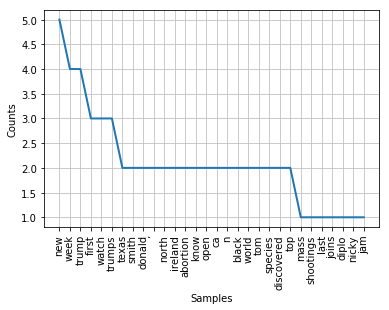

In [17]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(tokenized)
fdist.plot(30,cumulative=False)
plt.show()

In [18]:
#and get a list of all the bi-grams
Bigrams = (ngrams(tokenized, 2))

In [19]:
#and get a list of all the uni-grams
unigrams = ngrams(tokenized, 1)

In [20]:
# get the frequency of each bigram in our corpus
BigramFreq = collections.Counter(Bigrams)

In [21]:
# get the frequency of each unigram in our corpus
unigramsFreq = collections.Counter(unigrams)

In [22]:
BigramFreq

Counter({('2', 'hugh'): 1,
         ('3', 'jim'): 1,
         ('49ers', 'linebacker'): 1,
         ('ab', 'irish'): 1,
         ('abortion', 'amendment'): 1,
         ('abortion', 'laws'): 1,
         ('activists', 'older'): 1,
         ('adam', 'schiff'): 1,
         ('age', '3'): 1,
         ('albert', 'nobbs'): 1,
         ('aldon', 'smith'): 1,
         ('allard', 'van'): 1,
         ('amazon', 'prime'): 1,
         ('amendment', 'ryan'): 1,
         ('american', 'ra'): 1,
         ('americans', 'fro'): 1,
         ('among', 'aldon'): 1,
         ('animal', 'reportedly'): 1,
         ('arrested', '49ers'): 1,
         ('azarenka', 'giants'): 1,
         ('back', 'critics'): 1,
         ('bags', 'morgan'): 1,
         ('ban', 'pro'): 1,
         ('bank', 'closures'): 1,
         ('barbados', 'elects'): 1,
         ('bending', 'tinker'): 1,
         ('black', 'americans'): 1,
         ('black', 'smoker'): 1,
         ('blasts', 'castrato'): 1,
         ('bomb', 'inside'): 1,
        

In [23]:
# what are the ten most popular 1-grams in this corpus?
unigramsFreq.most_common(10)

[(('new',), 5),
 (('week',), 4),
 (('trump',), 4),
 (('first',), 3),
 (('watch',), 3),
 (('trumps',), 3),
 (('texas',), 2),
 (('smith',), 2),
 (('donald',), 2),
 (('’',), 2)]

In [24]:
# what are the ten most popular bi-grams in this corpus?
BigramFreq.most_common(10)

[(('donald', 'trump'), 2),
 (('’', 'new'), 2),
 (('mass', 'shootings'), 1),
 (('shootings', 'texas'), 1),
 (('texas', 'last'), 1),
 (('last', 'week'), 1),
 (('week', 'smith'), 1),
 (('smith', 'joins'), 1),
 (('joins', 'diplo'), 1),
 (('diplo', 'nicky'), 1)]

In [25]:
type(BigramFreq)

collections.Counter

In [26]:
#converting collection into dataframe
from collections import Counter
df_bigram = pd.DataFrame.from_dict(BigramFreq, orient='index').reset_index()
df_unigram = pd.DataFrame.from_dict(unigramsFreq, orient='index').reset_index()


In [27]:
#renaming columns
df_bigram = df_bigram.rename(columns={'index':'event', 0:'count'})
df_unigram = df_unigram.rename(columns={'index':'event', 0:'count'})

In [28]:
#saving into csv file on local system
df_bigram.to_csv('BigramFreq.csv')
df_unigram.to_csv('UnigramFreq.csv')

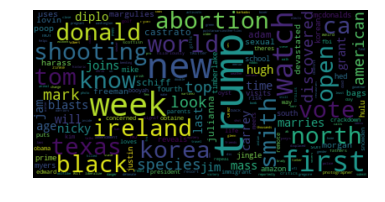

In [29]:
#wordcloud visul
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50).generate(newdata)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()